In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.feature_extraction import FeatureHasher
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("IMDb Movies India.csv", delimiter=",", encoding="iso-8859-1")


In [3]:
data.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [5]:
data["Year"].head(5)

0       NaN
1    (2019)
2    (2021)
3    (2019)
4    (2010)
Name: Year, dtype: object

In [6]:

data.Year = data["Year"].apply(lambda value: re.sub(r'\D',"",str(value)))
data.Year.isnull().sum()

0

In [7]:
data.Year.head(5)

0        
1    2019
2    2021
3    2019
4    2010
Name: Year, dtype: object

In [8]:
data.Year.fillna(data.Year.mean(),inplace=True)

In [9]:
data.Year.head(5)
data.Year.isnull().sum()

0

In [10]:
data.Duration.head()

0        NaN
1    109 min
2     90 min
3    110 min
4    105 min
Name: Duration, dtype: object

In [11]:
data.Duration = data["Duration"].apply(lambda value: re.sub(r'\D',"",str(value)))

In [12]:
data.Duration
data.Duration.isna().sum()

0

In [13]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [14]:
data.Rating.isnull().sum()

7590

In [15]:
data.Rating.head()

0    NaN
1    7.0
2    NaN
3    4.4
4    NaN
Name: Rating, dtype: float64

In [16]:
data["Rating"].fillna(round(data.Rating.mean(),2),inplace=True)
data.Rating.head(5)

0    5.84
1    7.00
2    5.84
3    4.40
4    5.84
Name: Rating, dtype: float64

In [17]:
data.Rating.isna().sum()

0

In [18]:
data.Votes.isna().sum()

7589

In [19]:
data.Votes = pd.to_numeric(data.Votes, errors="coerce")
data.Votes = data["Votes"].apply(lambda value: re.sub(r'\D',"",str(value)))
data["Votes"].fillna(round(data.Votes.mean(),2),inplace=True)

In [20]:
data.Votes.isnull().sum()
data.Votes.isna().sum()

0

In [21]:
data["Actor 1"] = pd.to_numeric(data["Actor 1"],errors='coerce')
data["Actor 1"].isna().sum()
data["Actor 1"].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Actor 1, dtype: float64

In [22]:
data.columns


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [23]:
print(data.head(5))
data.isna().sum().head()

                                 Name  Year Duration            Genre  Rating  \
0                                                               Drama    5.84   
1  #Gadhvi (He thought he was Gandhi)  2019      109            Drama    7.00   
2                         #Homecoming  2021       90   Drama, Musical    5.84   
3                             #Yaaram  2019      110  Comedy, Romance    4.40   
4                   ...And Once Again  2010      105            Drama    5.84   

  Votes            Director  Actor 1             Actor 2          Actor 3  
0             J.S. Randhawa      NaN              Birbal  Rajendra Bhatia  
1    80       Gaurav Bakshi      NaN      Vivek Ghamande    Arvind Jangid  
2        Soumyajit Majumdar      NaN   Plabita Borthakur       Roy Angana  
3   350          Ovais Khan      NaN          Ishita Raj  Siddhant Kapoor  
4              Amol Palekar      NaN  Rituparna Sengupta      Antara Mali  


Name           0
Year           0
Duration       0
Genre       1877
Rating         0
dtype: int64

In [24]:
print(data.head(5))

                                 Name  Year Duration            Genre  Rating  \
0                                                               Drama    5.84   
1  #Gadhvi (He thought he was Gandhi)  2019      109            Drama    7.00   
2                         #Homecoming  2021       90   Drama, Musical    5.84   
3                             #Yaaram  2019      110  Comedy, Romance    4.40   
4                   ...And Once Again  2010      105            Drama    5.84   

  Votes            Director  Actor 1             Actor 2          Actor 3  
0             J.S. Randhawa      NaN              Birbal  Rajendra Bhatia  
1    80       Gaurav Bakshi      NaN      Vivek Ghamande    Arvind Jangid  
2        Soumyajit Majumdar      NaN   Plabita Borthakur       Roy Angana  
3   350          Ovais Khan      NaN          Ishita Raj  Siddhant Kapoor  
4              Amol Palekar      NaN  Rituparna Sengupta      Antara Mali  


In [25]:
data.isna().sum().head()

Name           0
Year           0
Duration       0
Genre       1877
Rating         0
dtype: int64

In [26]:
data.isnull().sum().head()

Name           0
Year           0
Duration       0
Genre       1877
Rating         0
dtype: int64

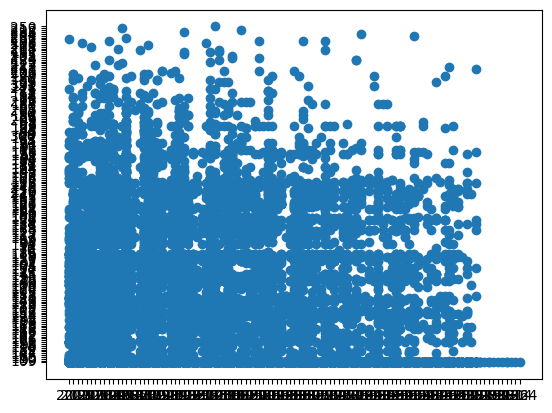

In [27]:
plt.scatter(data.Year, data.Duration)


In [62]:
data.Votes.isnull().sum()

0

In [32]:
# plt.plot(data["Year"],data["Actor1"])
# plt.show()

In [33]:
# plt.plot(data["Year"],data["Actor2"])
# plt.show()

In [34]:
# plt.plot(data["Year"],data["Actor3"])
# plt.show()

In [35]:
data.Genre.isna().sum()
data.Genre.isnull().sum()
data.Genre.fillna(0,inplace=True)
data.Genre.isnull().sum()
data.Duration.isna().sum()
data.Duration.isnull().sum()
data.Year.isnull().sum()
data.Year.isna().sum()

0

In [36]:
data.head(5)
data.replace("",0,inplace=True)
data.head(5)
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [37]:
data.isna().sum()

Name            0
Year            0
Duration        0
Genre           0
Rating          0
Votes           0
Director      525
Actor 1     15509
Actor 2      2384
Actor 3      3144
dtype: int64

In [38]:
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
encoder3 = LabelEncoder()
encoder4 = LabelEncoder()
encoder5 = LabelEncoder()

# Encode each column
data['Actor1'] = encoder1.fit_transform(data['Actor 1'].astype(str))
data['Actor2'] = encoder2.fit_transform(data['Actor 2'].astype(str))
data['Actor3'] = encoder3.fit_transform(data['Actor 3'].astype(str))
data['Director'] = encoder4.fit_transform(data['Director'].astype(str))
data['Genre'] = encoder5.fit_transform(data['Genre'].astype(str))

In [39]:
data.isna().sum()

Name            0
Year            0
Duration        0
Genre           0
Rating          0
Votes           0
Director        0
Actor 1     15509
Actor 2      2384
Actor 3      3144
Actor1          0
Actor2          0
Actor3          0
dtype: int64

In [40]:
data = data.drop(columns=['Actor 1','Actor 2', 'Actor 3'])

In [41]:
data.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor1      0
Actor2      0
Actor3      0
dtype: int64

In [42]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor1', 'Actor2', 'Actor3'],
      dtype='object')

In [47]:
regressor = LinearRegression()
#finalData = data.drop(columns=['Votes', 'Director','Genre','Actor 1','Actor 2','Actor 3'])
#finalData = data.drop(columns=['Votes'])

#finalData = data['Year', 'Duration', 'Genre', 'Rating', 'Director','Actor1', 'Actor2', 'Actor3']
finalData = data[["Year", "Duration", "Votes",'Director','Genre','Actor1','Actor2','Actor3']]
targetData = data["Rating"]

XTrain, XTest, YTrain, YTest = train_test_split(finalData,targetData, test_size=20, random_state=42)

regressor.fit(XTrain,YTrain)

predection = regressor.predict(XTest)


print(predection[:5])
data.shape

YTest.shape
predection.shape


[5.95078638 6.03959827 5.80517044 5.69852582 5.96960472]


(20,)

In [48]:
accuracy = mean_absolute_error(YTest, predection)
print("mean_absolute_error=",accuracy)

mean_absolute_error= 0.6051925745156431
